In [192]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import pyfolio
import datetime
%matplotlib inline

In [305]:
# Extract columns from dataframe
# EURUSD
df_cur1 = pd.read_csv('data/2012-2017_EU.csv')
cur1_col1 = df_cur1.iloc[:, 4].values
cur1_index = df_cur1.iloc[:, 0].values
cur1_volume = df_cur1.iloc[:, 5].values
# EURCAD
df_cur2 = pd.read_csv('data/2012-2017_EC.csv')
cur2_col1 = df_cur2.iloc[:, 4].values
cur2_index = df_cur2.iloc[:, 0].values
cur2_volume = df_cur2.iloc[:, 5].values
# EURAUD
df_cur3 = pd.read_csv('data/2012-2017_EA.csv')
cur3_col1 = df_cur3.iloc[:, 4].values
cur3_index = df_cur3.iloc[:, 0].values
cur3_volume = df_cur3.iloc[:, 5].values
# EURCHF
df_cur4 = pd.read_csv('data/2012-2017_ECH.csv')
cur4_col1 = df_cur4.iloc[:, 4].values
cur4_index = df_cur4.iloc[:, 0].values
cur4_volume = df_cur4.iloc[:, 5].values
# EURGBP
df_cur5 = pd.read_csv('data/2012-2017_EG.csv')
cur5_col1 = df_cur5.iloc[:, 4].values
cur5_index = df_cur5.iloc[:, 0].values
cur5_volume = df_cur5.iloc[:, 5].values

# Drops weekend values (volume == 0)
# Assumes equal shape of all currency symbol data
jj = 0
for j in range(len(cur1_col1)):
    if cur1_volume[j] > 0:
        cur1_col1[jj] = cur1_col1[j]
        cur2_col1[jj] = cur2_col1[j]
        cur3_col1[jj] = cur3_col1[j]
        cur4_col1[jj] = cur4_col1[j]
        cur5_col1[jj] = cur5_col1[j]
        jj += 1

In [306]:
# Sample size parameter
samplesize = 100 # hours

# Array initializations
cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio = ([] for i in range(5))
cur1_localmax, cur2_localmax, cur3_localmax, cur4_localmax, cur5_localmax = ([] for i in range(5))
cur1_localmin, cur2_localmin, cur3_localmin, cur4_localmin, cur5_localmin = ([] for i in range(5))

# Speed measuring
ping = time.process_time()

# First calc
cur1_localmax.insert(0, float(max(cur1_col1[:samplesize])))
cur2_localmax.insert(0, float(max(cur2_col1[:samplesize])))
cur3_localmax.insert(0, float(max(cur3_col1[:samplesize])))
cur4_localmax.insert(0, float(max(cur4_col1[:samplesize])))
cur5_localmax.insert(0, float(max(cur5_col1[:samplesize])))

cur1_localmin.insert(0, float(min(cur1_col1[:samplesize])))
cur2_localmin.insert(0, float(min(cur2_col1[:samplesize])))
cur3_localmin.insert(0, float(min(cur3_col1[:samplesize])))
cur4_localmin.insert(0, float(min(cur4_col1[:samplesize])))
cur5_localmin.insert(0, float(min(cur5_col1[:samplesize])))

for i in range(samplesize, len(cur1_col1)):
    # Get localmaxes and localmins respectively from extracted datasets

    # Array boundary precausions
    if i > 0: 
        # Cur1 max
        if cur1_col1[i] > cur1_localmax[i-samplesize-1]:
            cur1_localmax.insert(i-samplesize, cur1_col1[i])
        elif cur1_localmax[i-samplesize-1] == cur1_col1[i-samplesize-1]:
            cur1_localmax.insert(i-samplesize, float(max(cur1_col1[i-samplesize:i])))
        else:
            cur1_localmax.insert(i-samplesize, cur1_localmax[i-samplesize-1])
        
        # Cur2 max
        if cur2_col1[i] > cur2_localmax[i-samplesize-1]:
            cur2_localmax.insert(i-samplesize, cur2_col1[i])
        elif cur2_localmax[i-samplesize-1] == cur2_col1[i-samplesize-1]:
            cur2_localmax.insert(i-samplesize, float(max(cur2_col1[i-samplesize:i])))
        else:
            cur2_localmax.insert(i-samplesize, cur2_localmax[i-samplesize-1])
        
        # Cur3 max
        if cur3_col1[i] > cur3_localmax[i-samplesize-1]:
            cur3_localmax.insert(i-samplesize, cur3_col1[i])
        elif cur3_localmax[i-samplesize-1] == cur3_col1[i-samplesize-1]:
            cur3_localmax.insert(i-samplesize, float(max(cur3_col1[i-samplesize:i])))
        else:
            cur3_localmax.insert(i-samplesize, cur3_localmax[i-samplesize-1])
            
        # Cur4 max
        if cur4_col1[i] > cur4_localmax[i-samplesize-1]:
            cur4_localmax.insert(i-samplesize, cur4_col1[i])
        elif cur4_localmax[i-samplesize-1] == cur4_col1[i-samplesize-1]:
            cur4_localmax.insert(i-samplesize, float(max(cur4_col1[i-samplesize:i])))
        else:
            cur4_localmax.insert(i-samplesize, cur4_localmax[i-samplesize-1])
            
        # Cur5 max
        if cur5_col1[i] > cur5_localmax[i-samplesize-1]:
            cur5_localmax.insert(i-samplesize, cur5_col1[i])
        elif cur5_localmax[i-samplesize-1] == cur5_col1[i-samplesize-1]:
            cur5_localmax.insert(i-samplesize, float(max(cur5_col1[i-samplesize:i])))
        else:
            cur5_localmax.insert(i-samplesize, cur5_localmax[i-samplesize-1])
            
        
        # Cur1 min
        if cur1_col1[i] < cur1_localmin[i-samplesize-1]:
            cur1_localmin.insert(i-samplesize, cur1_col1[i])
        elif cur1_localmin[i-samplesize-1] == cur1_col1[i-samplesize-1]:
            cur1_localmin.insert(i-samplesize, float(min(cur1_col1[i-samplesize:i])))
        else:
            cur1_localmin.insert(i-samplesize, cur1_localmin[i-samplesize-1])
        
        # Cur2 min
        if cur2_col1[i] < cur2_localmin[i-samplesize-1]:
            cur2_localmin.insert(i-samplesize, cur2_col1[i])
        elif cur2_localmin[i-samplesize-1] == cur2_col1[i-samplesize-1]:
            cur2_localmin.insert(i-samplesize, float(min(cur2_col1[i-samplesize:i])))
        else:
            cur2_localmin.insert(i-samplesize, cur2_localmin[i-samplesize-1])
        
        # Cur3 min
        if cur3_col1[i] < cur3_localmin[i-samplesize-1]:
            cur3_localmin.insert(i-samplesize, cur3_col1[i])
        elif cur3_localmin[i-samplesize-1] == cur3_col1[i-samplesize-1]:
            cur3_localmin.insert(i-samplesize, float(min(cur3_col1[i-samplesize:i])))
        else:
            cur3_localmin.insert(i-samplesize, cur3_localmin[i-samplesize-1])
            
        # Cur4 min
        if cur4_col1[i] < cur4_localmin[i-samplesize-1]:
            cur4_localmin.insert(i-samplesize, cur4_col1[i])
        elif cur4_localmin[i-samplesize-1] == cur4_col1[i-samplesize-1]:
            cur4_localmin.insert(i-samplesize, float(min(cur4_col1[i-samplesize:i])))
        else:
            cur4_localmin.insert(i-samplesize, cur4_localmin[i-samplesize-1])
            
        # Cur5 min
        if cur5_col1[i] < cur5_localmin[i-samplesize-1]:
            cur5_localmin.insert(i-samplesize, cur5_col1[i])
        elif cur5_localmin[i-samplesize-1] == cur5_col1[i-samplesize-1]:
            cur5_localmin.insert(i-samplesize, float(min(cur5_col1[i-samplesize:i])))
        else:
            cur5_localmin.insert(i-samplesize, cur5_localmin[i-samplesize-1])
        
        
        # Calculate ratios
        r_1 = (cur1_col1[i] - cur1_localmin[i-samplesize-1])/(cur1_localmax[i-samplesize-1] - cur1_localmin[i-samplesize-1])
        r_2 = (cur2_col1[i] - cur2_localmin[i-samplesize-1])/(cur2_localmax[i-samplesize-1] - cur2_localmin[i-samplesize-1])
        r_3 = (cur3_col1[i] - cur3_localmin[i-samplesize-1])/(cur3_localmax[i-samplesize-1] - cur3_localmin[i-samplesize-1])
        r_4 = (cur4_col1[i] - cur4_localmin[i-samplesize-1])/(cur4_localmax[i-samplesize-1] - cur4_localmin[i-samplesize-1])
        r_5 = (cur5_col1[i] - cur5_localmin[i-samplesize-1])/(cur5_localmax[i-samplesize-1] - cur5_localmin[i-samplesize-1])
        
        # Prevent o_r !E {[0,1]}
        if r_1 > 1:
            cur1_ratio.insert(i-samplesize, 1)
        elif r_1 < 0:
            cur1_ratio.insert(i-samplesize, 0)
        else:
            cur1_ratio.insert(i-samplesize, r_1)
            
        if r_2 > 1:
            cur1_ratio.insert(i-samplesize, 1)
        elif r_2 < 0:
            cur2_ratio.insert(i-samplesize, 0)
        else:
            cur2_ratio.insert(i-samplesize, r_2)
            
        if r_3 > 1:
            cur3_ratio.insert(i-samplesize, 1)
        elif r_3 < 0:
            cur3_ratio.insert(i-samplesize, 0)
        else:
            cur3_ratio.insert(i-samplesize, r_3)
        
        if r_4 > 1:
            cur4_ratio.insert(i-samplesize, 1)
        elif r_4 < 0:
            cur4_ratio.insert(i-samplesize, 0)
        else:
            cur4_ratio.insert(i-samplesize, r_4)
        
        if r_5 > 1:
            cur5_ratio.insert(i-samplesize, 1)
        elif r_5 < 0:
            cur5_ratio.insert(i-samplesize, 0)
        else:
            cur5_ratio.insert(i-samplesize, r_5)
        
        
        # Simple progress bar
        if i % (math.floor((len(cur1_col1)-1-samplesize)/10)) == 0:
            print('+ '*math.ceil(((len(cur1_col1)-1-samplesize)/10/i)**-1),
                  '- '*(10-math.ceil(((len(cur1_col1)-1-samplesize)/10/i)**-1)), sep='')

# Print elapsed time
pong = time.process_time()
print(pong-ping, 'seconds elapsed')

+ - - - - - - - - - 
+ + - - - - - - - - 
+ + + - - - - - - - 
+ + + + - - - - - - 
+ + + + + - - - - - 
+ + + + + + - - - - 
+ + + + + + + - - - 
+ + + + + + + + - - 
+ + + + + + + + + - 
+ + + + + + + + + + 
2.15625 seconds elapsed


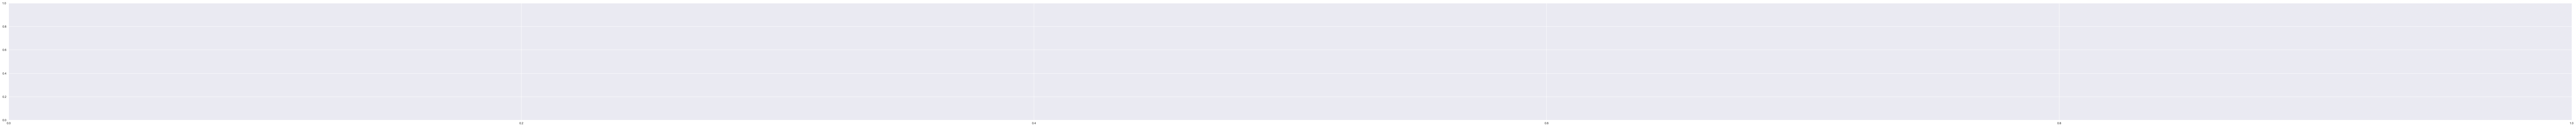

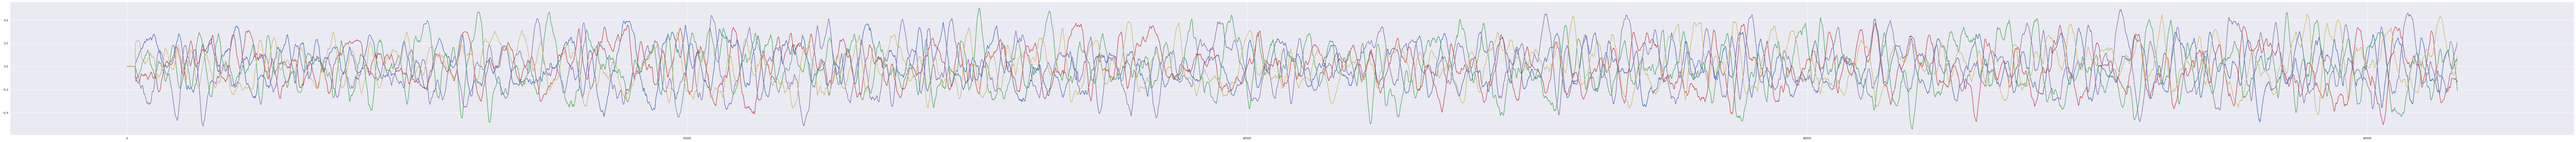

"\n# prevent skew\nfor i in range(ma_period):\n    cur1_avg_delta_ma.insert(i, cur1_avg_delta[i])\n\nprint(len(cur1_avg_delta))\nprint(len(cur1_avg_delta_ma))\n\nax.twinx().plot(cur1_col1[samplesize+1:len(cur2_ratio)+samplesize-1], '#afafaf')\nax.plot(cur1_avg_delta[:len(cur2_ratio)])\nax.plot(cur1_avg_delta_ma)\nax.plot([0]*len(cur2_ratio))\nax.locator_params(nbins=40)\nplt.figure(figsize=(150, 6)).add_subplot(212).plot(cur1_avg_delta_ma_ax)\nplt.plot([0]*len(cur1_avg_delta_ma_ax))\n#ax.plot(ratio_avg, 'r--')\nplt.savefig('EU_ratio_avg.pdf')\n"

In [309]:
fig = plt.figure(figsize = (150, 7))
ax = fig.add_subplot(111)

'''
ax.plot(cur1_ratio)
ax.plot(cur2_ratio)
ax.plot(cur3_ratio)
ax.plot(cur4_ratio)
ax.plot(cur5_ratio)

print(len(cur1_ratio))
print(len(cur2_ratio))
print(len(cur3_ratio))
print(len(cur4_ratio))
print(len(cur5_ratio))
'''

# Param
ma_period = 150
ax_period = 30

ratio_avg = [(cur1_ratio[i] + cur2_ratio[i] + cur3_ratio[i] + cur4_ratio[i] + cur5_ratio[i])/5 for i in range(len(cur2_ratio))]

cur1_avg_delta = [cur1_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur2_avg_delta = [cur2_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur3_avg_delta = [cur3_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur4_avg_delta = [cur4_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur5_avg_delta = [cur5_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]

cur1_avg_delta_ma = [0]*len(cur1_avg_delta)
cur2_avg_delta_ma = [0]*len(cur2_avg_delta)
cur3_avg_delta_ma = [0]*len(cur3_avg_delta)
cur4_avg_delta_ma = [0]*len(cur4_avg_delta)
cur5_avg_delta_ma = [0]*len(cur5_avg_delta)

for i in range(ma_period, len(cur1_avg_delta_ma)):
    cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period
    cur2_avg_delta_ma[i] = sum(cur2_avg_delta[i-ma_period:i])/ma_period
    cur3_avg_delta_ma[i] = sum(cur3_avg_delta[i-ma_period:i])/ma_period
    cur4_avg_delta_ma[i] = sum(cur4_avg_delta[i-ma_period:i])/ma_period
    cur5_avg_delta_ma[i] = sum(cur5_avg_delta[i-ma_period:i])/ma_period

cur1_avg_delta_ma_ax = [0]*len(cur1_avg_delta_ma)
for i in range(ax_period, len(cur1_avg_delta_ma_ax)):
    cur1_avg_delta_ma_ax[i] = (cur1_avg_delta_ma[i] - cur1_avg_delta_ma[i-ax_period])/ax_period

    
a = plt.figure(figsize=(150, 8))
b = a.add_subplot(111)
b.plot(cur1_avg_delta_ma)
b.plot(cur2_avg_delta_ma)
b.plot(cur3_avg_delta_ma)
b.plot(cur4_avg_delta_ma)
b.plot(cur5_avg_delta_ma)
plt.show()
'''
# prevent skew
for i in range(ma_period):
    cur1_avg_delta_ma.insert(i, cur1_avg_delta[i])

print(len(cur1_avg_delta))
print(len(cur1_avg_delta_ma))

ax.twinx().plot(cur1_col1[samplesize+1:len(cur2_ratio)+samplesize-1], '#afafaf')
ax.plot(cur1_avg_delta[:len(cur2_ratio)])
ax.plot(cur1_avg_delta_ma)
ax.plot([0]*len(cur2_ratio))
ax.locator_params(nbins=40)
plt.figure(figsize=(150, 6)).add_subplot(212).plot(cur1_avg_delta_ma_ax)
plt.plot([0]*len(cur1_avg_delta_ma_ax))
#ax.plot(ratio_avg, 'r--')
plt.savefig('EU_ratio_avg.pdf')
'''

43873
43873
43873
43873
43873 

43774
41609
41609 

2264


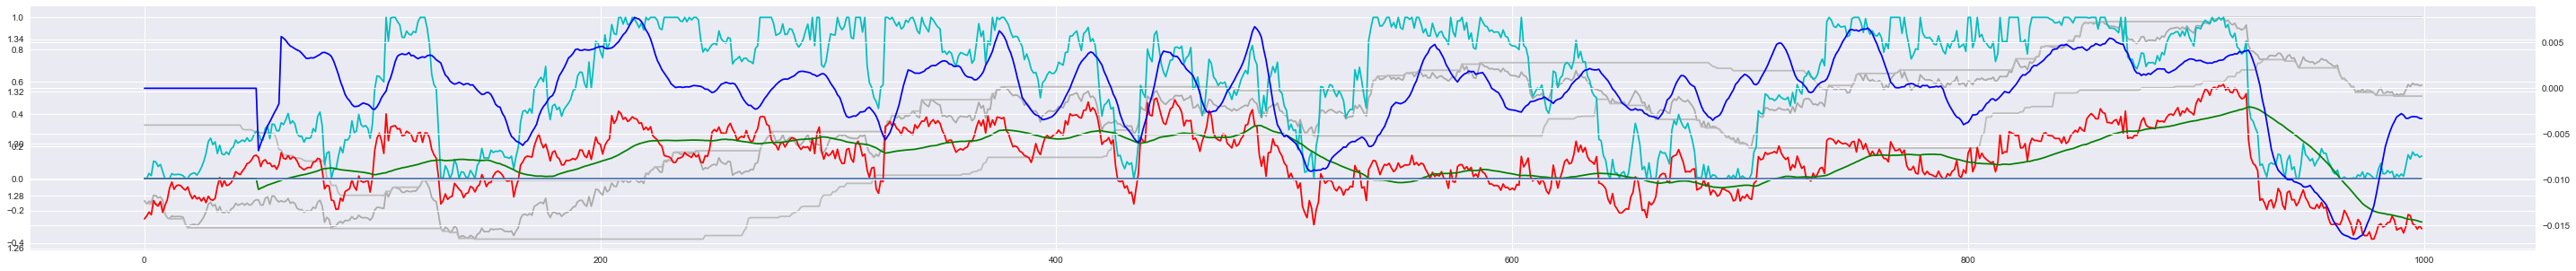

In [214]:
#samplesize: 1000
print(len(cur1_col1))
print(len(cur2_col1))
print(len(cur3_col1))
print(len(cur4_col1))
print(len(cur5_col1), '\n')

print(len(cur1_localmax))
print(len(cur1_avg_delta_ma_ax))
print(len(cur1_avg_delta_ma), '\n')

print(len(cur2_col1)-len(cur1_avg_delta_ma))

# Still does not explain the extra 568 shift
#--

fifi = plt.figure(figsize=(50, 5))
aa = fifi.add_subplot(111)
aa.plot(cur1_col1[samplesize:1000+samplesize], '#aaaaaa')
aa.plot(cur1_localmax[:1000], '#bbbbbb')
aa.plot(cur1_localmin[:1000], '#bbbbbb')

bb = aa.twinx()
bb.plot(cur1_ratio[:1000], 'c')
bb.plot(cur1_avg_delta[:1000], 'r')
bb.plot(cur1_avg_delta_ma[:1000], 'g')
bb.twinx().plot(cur1_avg_delta_ma_ax[:1000], 'b')
bb.plot([0]*1000)


In [300]:
# Params
ma_period = 200
ax_period = 20

ratio_avg = [(cur1_ratio[i] + cur2_ratio[i] + cur3_ratio[i] + cur4_ratio[i] + cur5_ratio[i])/5 for i in range(len(cur2_ratio))]
cur1_avg_delta = [-ratio_avg[i] + cur1_ratio[i] for i in range(len(ratio_avg))]
cur1_avg_delta_ma = [0]*len(cur1_avg_delta)
#print(cur1_avg_delta_ma)
for i in range(ma_period, len(cur1_avg_delta_ma)):
    cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period
    
for i in range(ma_period, len(cur1_avg_delta_ma)):
    cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period

cur1_avg_delta_ma_ax = [0]*len(cur1_avg_delta_ma)
for i in range(ax_period, len(cur1_avg_delta_ma_ax)):
    cur1_avg_delta_ma_ax[i] = (cur1_avg_delta_ma[i] - cur1_avg_delta_ma[i-ax_period])/ax_period

# --

In [313]:
'''
Every array except for raw quotes are adjusted
shift cur1_col1 by samplesize when calculating
'''
trade = 0
entryvals = []
exitvals = []
typevals = []
net_pips_1 = [0]

# Optimization
pip_arr = [0]

# Params
class self():
    pass

self.ax_threshold = 0.000
self.target = 0.0025 #0.025
self.stop = 0.0025 #0.005

optimize = 1
# --

ax_threshold = self.ax_threshold

for v in range(7):
    
    ax_threshold += 0.0001
    stop = self.stop
    
    for w in range(10):
        
        stop += 0.0025
        target = self.target
        
        for z in range(10):
            target += 0.0025

            trade = 0
            entryvals = []
            exitvals = []
            typevals = []
            net_pips_1 = [0]

            for x in range(len(cur1_avg_delta_ma_ax)):
                # if all closed
                if trade == 0:
                    # Buy (tradetype 1)
                    if cur1_avg_delta_ma_ax[x] >= ax_threshold:
                        tradetype = 1 # ><
                        trade = 1 # Keeping track of both trades simultaneously, also allows different stops/targets
                        open_rates[0] = cur1_col1[x+samplesize]

                        # Trades = open
                        entryvals.append(x) #entryvals[ev] = x # Store position in delta array
                        typevals.append(1) # For line coloring in backtest visualization

                    # Sell (tradetype 0)
                    elif cur1_avg_delta_ma_ax[x] <= -ax_threshold:
                        tradetype = 0 # <>
                        trade = 1 # Keeping track of both trades simultaneously, also allows different stops/targets
                        open_rates[0] = cur1_col1[x+samplesize]

                        # Trades = open
                        entryvals.append(x) # Store position in delta array
                        typevals.append(0) # For line coloring in backtest visualization

                # if > 0 open
                else: 
                    # Buy order
                    if tradetype == 1:
                        if cur1_avg_delta_ma_ax[x] <= 0:
                            net_pips_1.append(net_pips_1[len(net_pips_1)-1] + (cur1_col1[samplesize+x] - open_rates[0])*10000)
                            trade = 0
                            exitvals.append(x)
                        # Target hit detection
                        elif cur1_col1[samplesize+x] >= open_rates[0] + target:
                            net_pips_1.append(net_pips_1[len(net_pips_1)-1] + (cur1_col1[samplesize+x] - open_rates[0])*10000)
                            trade = 0
                            exitvals.append(x)
                        # Stop hit
                        elif cur1_col1[samplesize+x] <= open_rates[0] - stop:
                            net_pips_1.append(net_pips_1[len(net_pips_1)-1] + (cur1_col1[samplesize+x] - open_rates[0])*10000)
                            trade = 0
                            exitvals.append(x)
                            
                    # Sell order
                    else:
                        if cur1_avg_delta_ma_ax[x] >= 0:
                            net_pips_1.append(net_pips_1[len(net_pips_1)-1] + (open_rates[0] - cur1_col1[samplesize+x])*10000)
                            trade = 0
                            exitvals.append(x)
                        # Target
                        elif cur1_col1[samplesize+x] <= open_rates[0] - target:
                            net_pips_1.append(net_pips_1[len(net_pips_1)-1] + (open_rates[0] - cur1_col1[samplesize+x])*10000)
                            trade = 0
                            exitvals.append(x)
                        # Stop
                        elif cur1_col1[samplesize+x] >= open_rates[0] + stop:
                            net_pips_1.append(net_pips_1[len(net_pips_1)-1] + (open_rates[0] - cur1_col1[samplesize+x])*10000)
                            trade = 0
                            exitvals.append(x)

            net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
            pip_arr.append(net_pips_1[-1])
            
            if optimize == 1:
                # Getting R^2 value
                model = LinearRegression()
                X = np.array([i for i in range(len(net_pips_1))]).reshape(-1, 1)
                y = net_pips_1
                model.fit(X, y)
                r_squared = model.score(X, y)        
                print('R^2: %.3f, pips: %.1f' % (r_squared, net_pips_1[-1]))
                
                fig = plt.figure(figsize=(10, 5))
                ccc = fig.add_subplot(111)
                plt.plot(net_pips_1)
                TITLENAME = 'R^2: %.4f, pips: %.1f, ax_threshold: %.5f, target: %.4f, stop: %.4f' % (r_squared, net_pips_1[-1], ax_threshold, target, stop)
                IMGNAME = 'data/bt_imgs/EURUSD_1/net_%.3f_%.1f.png' % (r_squared, net_pips_1[-1])
                plt.title(TITLENAME)
                plt.savefig(IMGNAME)
                plt.close(fig)

if optimize == 0:     
    plt.figure(figsize=(15, 8))
    plt.plot(net_pips_1, 'k--')
    net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
    print('final pip val:', net_pips_1[-1])
    
    plt.plot(net_pips_1, linewidth=2.0, color='r')
    plt.title('Cumulative pip-gain')
    red_patch = mpatches.Patch(color='r', label='net gain')
    black_patch = mpatches.Patch(color='k', label='gross gain')
    plt.legend(handles=[red_patch, black_patch])


R^2: 0.017, pips: 115.7
R^2: 0.002, pips: -23.0
R^2: 0.194, pips: 706.4
R^2: 0.609, pips: 2081.8
R^2: 0.467, pips: 1306.8
R^2: 0.354, pips: 921.3
R^2: 0.511, pips: 1336.0
R^2: 0.528, pips: 1466.1
R^2: 0.586, pips: 1682.8
R^2: 0.538, pips: 1670.9
R^2: 0.015, pips: 497.5
R^2: 0.331, pips: 1311.1
R^2: 0.551, pips: 2071.7
R^2: 0.565, pips: 2335.8
R^2: 0.544, pips: 1913.0
R^2: 0.521, pips: 1647.7
R^2: 0.606, pips: 2132.7
R^2: 0.598, pips: 1921.1
R^2: 0.674, pips: 2377.0
R^2: 0.655, pips: 2345.1
R^2: 0.144, pips: 685.4
R^2: 0.545, pips: 2217.3
R^2: 0.644, pips: 2380.7
R^2: 0.678, pips: 2732.0
R^2: 0.681, pips: 2476.0
R^2: 0.601, pips: 1980.2
R^2: 0.712, pips: 2589.3
R^2: 0.634, pips: 1933.7
R^2: 0.717, pips: 2532.2
R^2: 0.693, pips: 2554.9
R^2: 0.445, pips: 1446.0
R^2: 0.593, pips: 1915.5
R^2: 0.674, pips: 2251.8
R^2: 0.727, pips: 2790.2
R^2: 0.717, pips: 2506.0
R^2: 0.654, pips: 2050.5
R^2: 0.753, pips: 2782.6
R^2: 0.689, pips: 2148.0
R^2: 0.765, pips: 2739.3
R^2: 0.744, pips: 2738.2
R^2: 0

R^2: 0.750, pips: 2775.4
R^2: 0.555, pips: 2310.8
R^2: 0.598, pips: 2043.5
R^2: 0.670, pips: 2597.7
R^2: 0.697, pips: 2850.2
R^2: 0.766, pips: 2635.0
R^2: 0.731, pips: 2575.9
R^2: 0.731, pips: 2559.2
R^2: 0.696, pips: 2347.7
R^2: 0.757, pips: 2762.2
R^2: 0.736, pips: 2635.4
R^2: 0.463, pips: 1758.6
R^2: 0.519, pips: 2031.2
R^2: 0.577, pips: 2376.3
R^2: 0.589, pips: 2715.7
R^2: 0.755, pips: 2749.2
R^2: 0.722, pips: 2656.2
R^2: 0.724, pips: 2573.2
R^2: 0.678, pips: 2377.9
R^2: 0.733, pips: 2701.9
R^2: 0.693, pips: 2550.1
R^2: 0.616, pips: 2207.1
R^2: 0.693, pips: 2688.5
R^2: 0.721, pips: 2874.6
R^2: 0.744, pips: 3191.9
R^2: 0.776, pips: 2924.6
R^2: 0.756, pips: 2917.8
R^2: 0.757, pips: 2829.2
R^2: 0.708, pips: 2531.1
R^2: 0.787, pips: 3024.1
R^2: 0.726, pips: 2721.4
R^2: 0.582, pips: 2216.9
R^2: 0.676, pips: 2616.8
R^2: 0.715, pips: 2872.5
R^2: 0.724, pips: 3109.7
R^2: 0.765, pips: 2915.2
R^2: 0.751, pips: 2847.4
R^2: 0.742, pips: 2690.6
R^2: 0.715, pips: 2504.1
R^2: 0.780, pips: 2942.7


R^2: 0.565, pips: 2300.2
R^2: 0.554, pips: 2341.6
R^2: 0.025, pips: 784.1
R^2: 0.102, pips: 1533.8
R^2: 0.335, pips: 2117.8
R^2: 0.313, pips: 1833.2
R^2: 0.381, pips: 1919.2
R^2: 0.578, pips: 2532.4
R^2: 0.495, pips: 2159.0
R^2: 0.470, pips: 2118.7
R^2: 0.517, pips: 2146.7
R^2: 0.540, pips: 2276.2
R^2: 0.060, pips: 572.7
R^2: 0.060, pips: 1412.4
R^2: 0.288, pips: 2001.3
R^2: 0.230, pips: 1637.2
R^2: 0.229, pips: 1613.0
R^2: 0.494, pips: 2292.8
R^2: 0.415, pips: 1980.5
R^2: 0.388, pips: 1946.3
R^2: 0.444, pips: 1965.1
R^2: 0.466, pips: 2094.6
R^2: 0.003, pips: 938.1
R^2: 0.103, pips: 1455.4
R^2: 0.404, pips: 2111.2
R^2: 0.354, pips: 1727.6
R^2: 0.386, pips: 1811.0
R^2: 0.561, pips: 2356.9
R^2: 0.506, pips: 2059.0
R^2: 0.515, pips: 2143.7
R^2: 0.561, pips: 2166.4
R^2: 0.574, pips: 2258.2
R^2: 0.002, pips: 910.5
R^2: 0.199, pips: 1683.2
R^2: 0.373, pips: 2133.5
R^2: 0.347, pips: 1782.5
R^2: 0.395, pips: 1923.8
R^2: 0.580, pips: 2471.7
R^2: 0.519, pips: 2178.3
R^2: 0.527, pips: 2263.0
R^2: